# Milestone 3 Assignment - Capstone Project

## Author - Eowyn Baughman

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>



## Tasks

In this project notebook, address the following:

1). **Problem and Key Insight**: high-level question and answer from the modeling analysis
* Describe the business problem and background
* Summarize the key findings/conclusions (from after performing model evaluation)
* Suggest next steps to take action or improve the models.

2). **Data**: quick overview of the data including 1 or 2 visualizations
* Report the source(s) of the data
* Include profile report
* Include 1 or 2 key visualizations
* Summarize the data exploration and preparation 

3). **Features**: overview on feature selection and transformations
* Describe the needed features
* Perform the feature engineering

4). **Model Building**: overview of algorithms and tools
* Describe at least 2 models selected and provide justification for their selection
* Split, Train, Run Models

5). **Model Evaluation**: highlight key achievements and main metrics
* Report on Accuracy and other key metrics (MSE, R^2, ROC/AUC, Precision, Recall?) for each model
* Summarize model performance comparisons

6). **Time on Task**: summary of time on each phase. (If you were going to bill the client for the work involved, report on the time per task.)
* Data Preparation and Exploration
* Feature Selection and Engineering
* Data Modeling and Evaluation


**Please use the section headings to ensure accurate grading.**


## Project Goal



Please see write up document

## Data Processing Steps

Please see writeup document

## Feature Engineering and Selection

In [ ]:
# Data file location
spd_file = "Cleaned_SPD_Data_2017.csv"

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import pandas_profiling
from sklearn import preprocessing
from scipy.stats import mstats
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import OneHotEncoder
import itertools

In [3]:
# Read data
spd_data = pd.read_csv(spd_file)
print(spd_data.head(n=3))

# Replace 'nan' with np.nan which Pandas/Numpy/etc recognize
spd_data.replace(to_replace='nan', value=np.nan, inplace=True)

# Likewise, replace UNKNOWN
spd_data.replace(to_replace='UNKNOWN', value=np.nan, inplace=True)
spd_data.dropna(inplace=True)

   Unnamed: 0           Call Type  Priority  \
0         0.0             visible       7.0   
1         1.0  non-emergency-call       2.0   
2         2.0             visible       7.0   

                              Initial Call Type Original Time Queued  \
0  premise check, officer initiated onview only        1/1/2017 0:00   
1        shots -delay/includes heard/no assault        1/1/2017 0:27   
2  premise check, officer initiated onview only        1/1/2017 1:10   

    Arrived Time Precinct  Response_Time  Call_Hour  Call_Day  Call_Month  \
0  1/1/2017 0:00    SOUTH            0.0        0.0       6.0         1.0   
1  1/1/2017 0:36    SOUTH          563.0        0.0       6.0         1.0   
2  1/1/2017 1:10    SOUTH            0.0        1.0       6.0         1.0   

                                    stemmed_tokens              Neighborhood  \
0         ['prem', 'check', 'off', 'in', 'onview']  Mount Baker Neighborhood   
1  ['shot', 'delay', 'includ', 'heard', 'assault']  M

In [4]:
print(spd_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393699 entries, 0 to 394049
Data columns (total 15 columns):
Unnamed: 0              393699 non-null float64
Call Type               393699 non-null object
Priority                393699 non-null float64
Initial Call Type       393699 non-null object
Original Time Queued    393699 non-null object
Arrived Time            393699 non-null object
Precinct                393699 non-null object
Response_Time           393699 non-null float64
Call_Hour               393699 non-null float64
Call_Day                393699 non-null float64
Call_Month              393699 non-null float64
stemmed_tokens          393699 non-null object
Neighborhood            393699 non-null object
Scaled_Priority         393699 non-null float64
Scaled_Response_Time    393699 non-null float64
dtypes: float64(8), object(7)
memory usage: 48.1+ MB
None


In [5]:
# Stemmed tokens are fine for cluster analysis via k-nearest-neighbors, but for other analyses, we would 
# prefer a single-value of some kind. 

# Collect all the words into one list
all_words = spd_data.stemmed_tokens.values
all_words_list = []
for entry in all_words:
    all_words_list.extend([x.strip().replace('\"','') for x in entry.replace("[","").replace("]","").split(',')])
print(all_words_list[:10])

["'prem'", "'check'", "'off'", "'in'", "'onview'", "'shot'", "'delay'", "'includ'", "'heard'", "'assault'"]


In [6]:
# Calculate the frequency distribution
fdist = nltk.FreqDist(all_words_list)

# Total number of bins
NumBins = fdist.B()

37


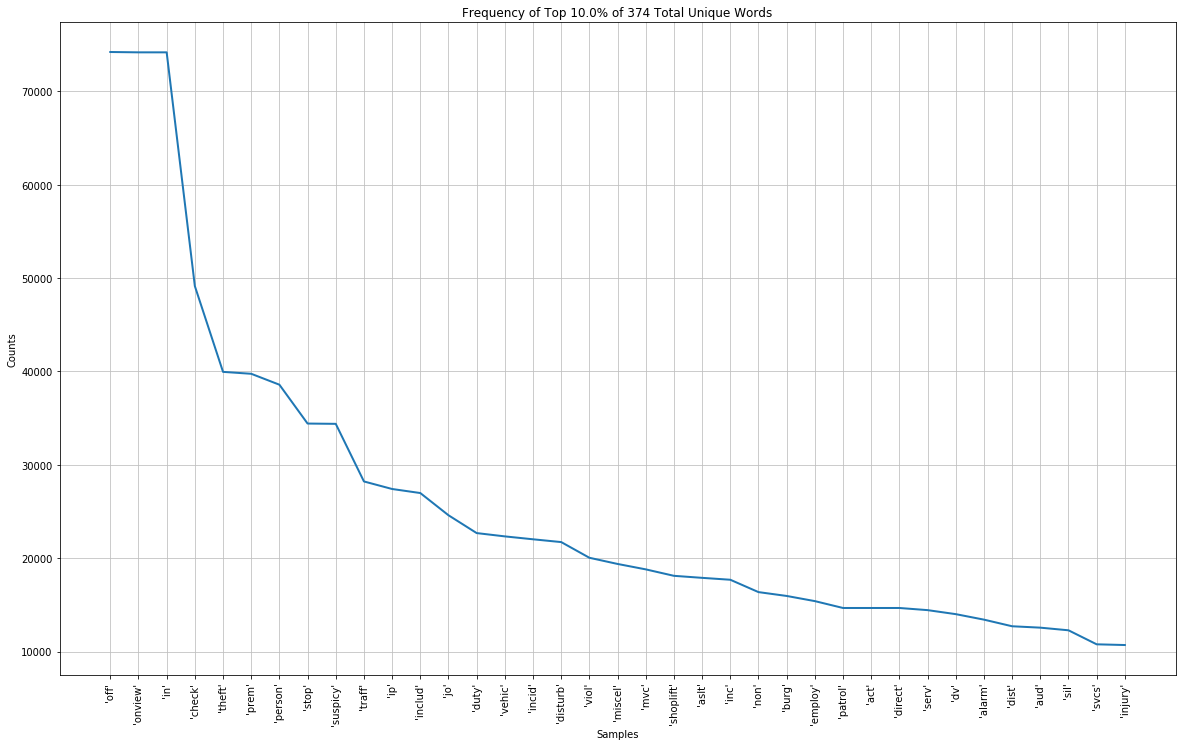

In [7]:
# Visualize the top 10% of words. 
%matplotlib inline
plt.subplots(figsize=(20,12))
pct = 0.10 # percent of words to plot
num = int(round(pct*NumBins)) # the nearest integer of the number of words to plot
print(num)
plt.title("Frequency of Top {}% of {} Total Unique Words".format(100*pct, len(fdist)))
fdist.plot(num)

In [8]:
# clean up the tokens
spd_data["list_tokens"] = spd_data.stemmed_tokens.apply(lambda x: x.replace('[','').replace(']','').replace('\'','').split(','))

# get rid of spaces introduced by split
spd_data.list_tokens = spd_data.list_tokens.apply(lambda x: [item.strip() for item in x])

In [9]:
# Extract a list of the most popular words, excluding the first 3 for reasons already discussed
all_word_freqs = zip(fdist.keys(), fdist.values())
sorted_all_word_freqs = sorted(all_word_freqs, key=lambda tup: tup[1], reverse=True)
top_words = [item[0] for item in sorted_all_word_freqs[3:num]]
print(top_words)
new_keys = [x.replace('\'','') for x in fdist.keys()]
#all_words_dict = dict(zip(new_keys, fdist.values()))
probs = [fdist.freq(x) for x in fdist.keys()]
all_probs = zip(new_keys, probs)

# Trying to eliminate the first 3 entries
sorted_all_probs = sorted(all_probs, key=lambda tup: tup[1], reverse=True)
sorted_probs_dict = dict(sorted_all_probs[3:]) # eliminate first three entries and convert to dictionary

["'check'", "'theft'", "'prem'", "'person'", "'stop'", "'suspicy'", "'traff'", "'ip'", "'includ'", "'jo'", "'duty'", "'vehic'", "'incid'", "'disturb'", "'viol'", "'miscel'", "'mvc'", "'shoplift'", "'aslt'", "'inc'", "'non'", "'burg'", "'employ'", "'patrol'", "'act'", "'direct'", "'serv'", "'dv'", "'alarm'", "'dist'", "'aud'", "'sil'", "'svcs'", "'injury'"]


In [10]:
# Helper function to calculate a risk score for the tokens

def total_word_frequency(token_list):
    # Calculate the total frequency of all tokens in the token_list
    # sorted_probs_dict must be defined in the namespace
    total_freq = 0
    for token in token_list:
        try:
            total_freq += sorted_probs_dict[token]
        except KeyError:  # because we removed 3 keys
            pass        
    return total_freq
        

# Assign the risk score as a new column
spd_data["token_prob"] = spd_data.list_tokens.apply(total_word_frequency)

In [11]:
# Min-max scale token prob to get on 0-1 scale
min_max_scaler = preprocessing.MinMaxScaler()
# scale the numeric values
print(spd_data.token_prob[:3])
spd_data['token_prob'] = min_max_scaler.fit_transform(spd_data.iloc[:,[16]])
print(spd_data.token_prob[:3])

0    0.055066
1    0.021168
2    0.055066
Name: token_prob, dtype: float64
0    0.608233
1    0.233790
2    0.608233
Name: token_prob, dtype: float64


In [12]:
# Check out the correlation matrix. We already know that things like Priority and Scaled_Priority
# will be perfectly correlated, so start by removing the non-scaled version from the dataframe
# Drop response time related variables as well since a form of those will be the target
# We can also remove the call-text and tokens since we've used them to make our numeric token_prob column
# We will create a binary response time target variable, so drop that scaled version
response_time = spd_data.Response_Time
droplist = ['Priority', 'stemmed_tokens', 'list_tokens', 'Initial Call Type',
           'Original Time Queued', 'Arrived Time', 'Unnamed: 0', 'Scaled_Response_Time']
call_data = spd_data.drop(droplist, axis=1)

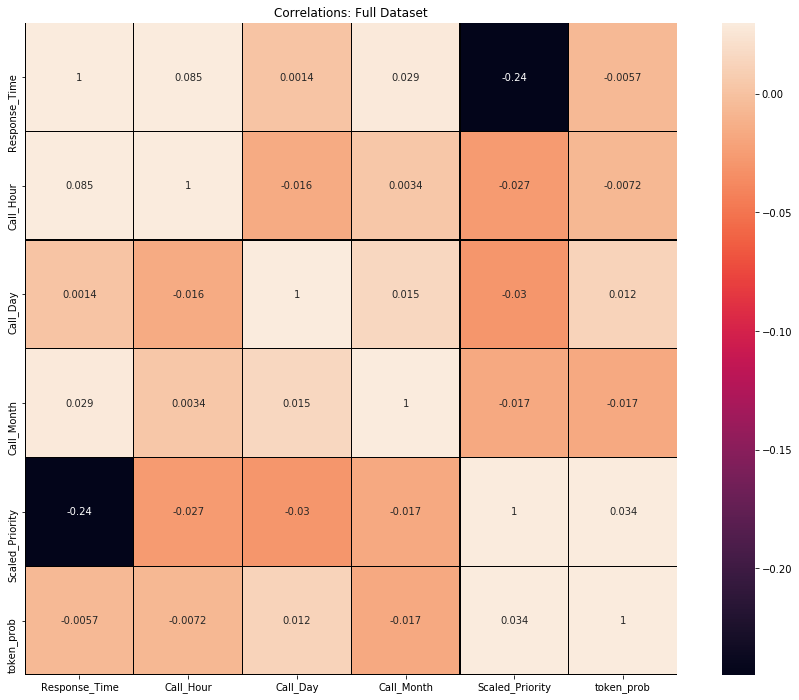

In [13]:
# Plot the correlation heat map and correlation values
%matplotlib inline
plt.subplots(figsize=(16,12))
plt.title("Correlations: Full Dataset")
sns.heatmap(call_data.corr(), linewidths=0.25, vmax=0.03, square=True, linecolor='k', annot=True)

So those correlations are rubbish. The only thing response time correlates well with is assigned priority, which it certainly ought to! Even that's only 0.25. I have a few ideas for what to try next:
1. One-hot-Encode the other categorical variables, call-type, neighborhood, and precinct
2. Make response time itself categorical, after checking out its distribution (we already know there are 40% instant responses)
3. Split the data into "onview" ie call-type = visible, and the other call-types, since I think a cop being present is one of the bigger influencers.
4. Look for non-linear relationships: mutual information rather than linear correlation
5. Consider one-hot-encoding the tokens, which would greatly expand the number of columns. Or maybe just do the top 40 words. 
6. Use random forest model to help select best features - not on encoded categoricals, as that dilutes their importance

My concern is that if we can't see stronger relationships, we might be facing a problem that would require a neural net to solve, which would require me to figure out how to use TensorFlow as a backend. I am not keen on doing that in the next 3 weeks. 

In [14]:
# One hot encode the other categoricals. Neighborhood made the matrix very large, do that later
other_cats = ['Call Type', 'Precinct']
call_data = pd.get_dummies(call_data, columns=other_cats)

C:\Users\eowyn\Anaconda2\lib\site-packages\pandas\plotting\_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


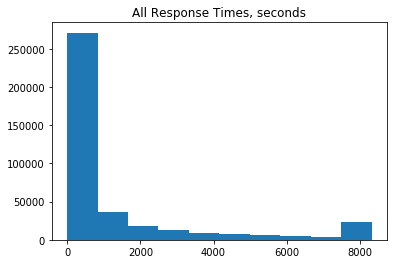

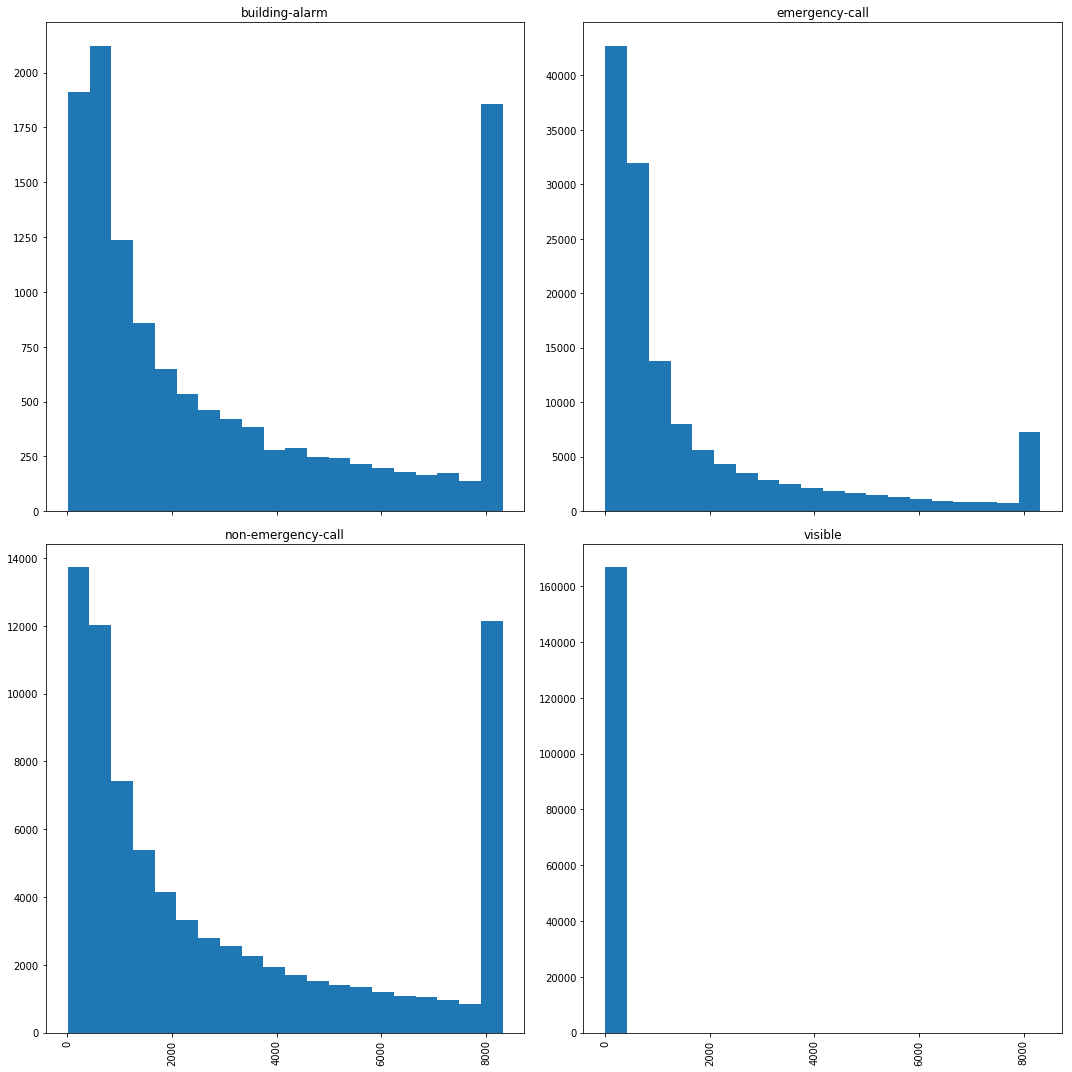

In [15]:
# Plot the distribution of response time and create sensible categories
%matplotlib inline
nbins = 20
import pylab as pl
#axes = spd_data.hist(column='Response_Time', bins=nbins)
pl.title("All Response Times, seconds")
plt.hist(spd_data.Response_Time)

# Now group by call-type and plot response time using same bins
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
axes = spd_data.hist(column='Response_Time', by='Call Type', sharex=True, ax=ax, bins=nbins)
pl.tight_layout()


Please be careful examining these plots - they have different y-axes because the scales are so different. 

Confirmed -- the "visible" call types (ie, a cop happened to be present) has the most instant responses by a long shot. Which clearly makes sense; they're already there! Emergency (911) calls have a lot of fast responses, which is good. Non-emergency calls have a more bimodal distrbution, with almost as many very-slow respones as fast responses. Recall that anything over 8000 seconds was windsorized down to 8K. Alarm calls are fairly rare, and have a distribution similar to non-emergency calls. 

Based on these distributions, a sensible split of response time into a categorical variable could be: <300 seconds is "fast", 301-2000 is "medium", 2001-6000 is "slow", >6000 is "dgaf". Or whatever you call it when you call the cops and they don't show up for almost 2 hours. But we actually want something binary to do classification problems, in which case I'd split it into <300 sec (<5min) and everything else. 

In [16]:
# Put the binary version of response time into the data frame 
call_data['Fast_Response'] = np.where(spd_data.Response_Time<300, 1, 0)
call_data.drop('Response_Time', axis = 1, inplace=True)
print(call_data.head())          

   Call_Hour  Call_Day  Call_Month              Neighborhood  Scaled_Priority  \
0        0.0       6.0         1.0  Mount Baker Neighborhood            0.750   
1        0.0       6.0         1.0  Mount Baker Neighborhood            0.125   
2        1.0       6.0         1.0  Mount Baker Neighborhood            0.750   
3        1.0       6.0         1.0  Mount Baker Neighborhood            0.250   
4        2.0       6.0         1.0  Mount Baker Neighborhood            0.250   

   token_prob  Call Type_building-alarm  Call Type_emergency-call  \
0    0.608233                         0                         0   
1    0.233790                         0                         0   
2    0.608233                         0                         0   
3    0.601117                         1                         0   
4    0.241796                         0                         0   

   Call Type_non-emergency-call  Call Type_visible  Precinct_EAST  \
0                            

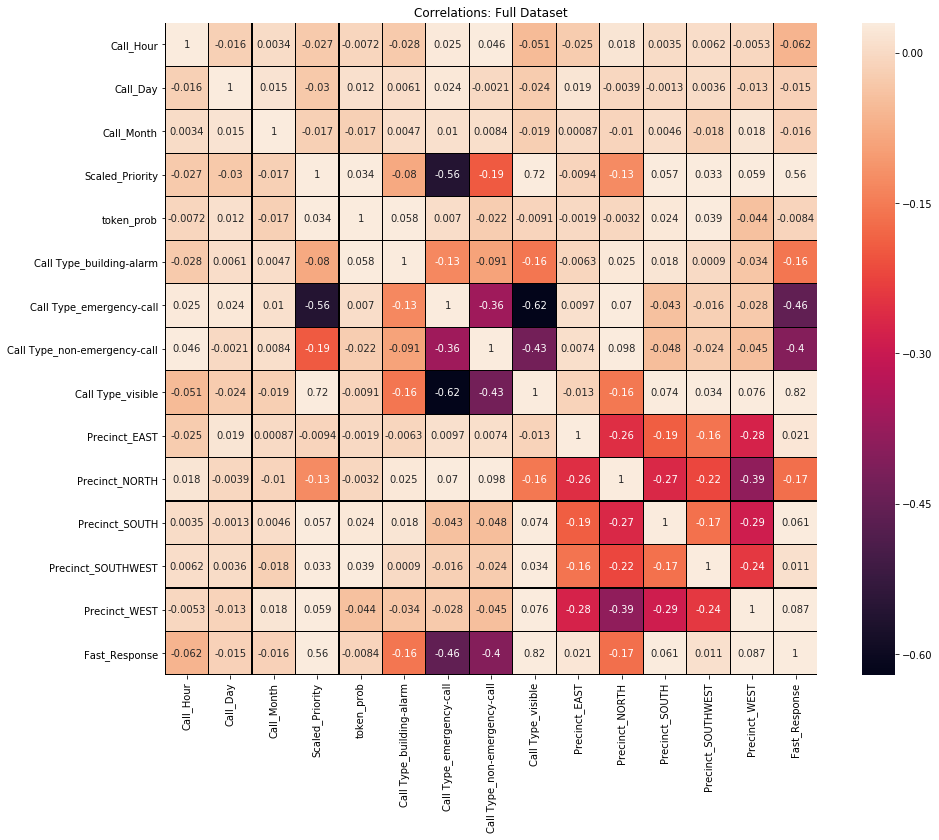

In [17]:
#check out the correlations again. Also calculate the mutual information

# Plot the correlation heat map and correlation values
%matplotlib inline
plt.subplots(figsize=(16,12))
plt.title("Correlations: Full Dataset")
sns.heatmap(call_data.corr(), linewidths=0.25, vmax=0.03, square=True, linecolor='k', annot=True)

This is looking considerably better already. Notice the strong correlation between a fast response and call type visible, which we visualized in histograms previously. The other call modes are all nevatively correlated with fast response. There is a positive correlation with priority, which makes sense. There is a negative correlation with the north precinct, which helps support the idea that they need more resources to effectively respond to crime. The time of day, day of week, and month of year do not have a strong correlation, suggesting that staffing levels are already well-matched to "demand" as it were.

The neighboorhood encoding made the dataframe just too big and unweildy to look at this way, so I need to consider other ways to handle it. For now let's calculate mutual information between Fast_Response and the set of possible predictors (still excluding neighborhood).

In [18]:
# Use forward selection to select features. This is very slow. 
def forward_selected(data, response, print_table=True):
    """Linear model designed by forward selection. Based on AIC

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data
    
    print_table: boolean, switch on/off OLS summary table printing (default On)

    Returns:
    --------
    results: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
    selected: a list of chosen variables
    formula: the OLS style formula of the model
    """
    import statsmodels.formula.api as sm
    # Start with no factors (intercept only)
    formula = "{} ~ 1".format(response)
    best_aic = sm.ols(formula, data).fit().aic
    
    
    # Go through remaining sets of variables one-by-one
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_aic = best_aic
    #print("AIC with all variables {:0.2f}".format(best_aic))
    # Check if any variables remain and if we haven't improved by adding any yet
    while remaining:
        aic_candidates = []
        for candidate in remaining:
            # Try adding the candidate column
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            # Get AIC
            aic = sm.ols(formula, data).fit().aic
            #print("Candidate: {}, AIC: {}".format(candidate, aic))
            # Append tuple of the form (aic, candidate)
            aic_candidates.append((aic, candidate))
        # Sort all the pairs by the first entry of tuple (default of sort() method)
        aic_candidates.sort()
        # Remember that the sort() method sorts by smallest to largest of first entry here.
        #   If you were to change the criteria to something that needs to be maximized, change sort/pop order!
        best_new_aic, best_candidate = aic_candidates.pop(0)
        # Now check if we have something better. If we do, add that to the model
        # if not, remove it from the candidate pool and go to the next canddiate feature
        #print("Comparing {} < {}".format(best_new_aic, current_aic))
        if best_new_aic < current_aic:
            #print("{} added to selected: {}".format(best_candidate, selected))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_aic = best_new_aic
        else:
            break
        # Now we repeat the process with all the remaining candidate columns

    # Here is the final formula!
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    # Get the model object
    results = sm.ols(formula, data).fit()
    if print_table:
        print(results.summary())
    return results, selected, formula

print('Forward Selected, all features')
# OLS requires column headers to not have any spaces or dashes, so fix that temporarily
cols = list(call_data) # store original column names
new_cols = [colname.replace(' ','_').replace('-','_') for colname in list(call_data)]
call_data_small = call_data.sample(frac=0.2)  # use just fraction of the data, randomly sampled, to speed this up
call_data_small.columns = new_cols
call_data_small = call_data_small.drop('Neighborhood', axis=1) # to consider only numeric variables which is A LOT faster
# Anyway the neighborhood variables lead to co-linearity warnings, and none of the coefficients were significant
results, formula, retained = forward_selected(call_data_small, 'Fast_Response')
print(formula)

Forward Selected, all features
                            OLS Regression Results                            
Dep. Variable:          Fast_Response   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 1.724e+04
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:03:52   Log-Likelihood:                -11422.
No. Observations:               78740   AIC:                         2.287e+04
Df Residuals:                   78729   BIC:                         2.297e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

By forward selection, the variables
['Call_Type_visible', 'Call_Type_emergency_call', 'Scaled_Priority', 'Precinct_NORTH', 'Precinct_SOUTHWEST', 'Call_Hour', 'Precinct_SOUTH', 'Call_Type_building_alarm', 'Precinct_EAST', 'Call_Month', 'Call_Day', 'token_prob']

are found to be significant with respect to an ordinary least squares model, and to be most influential on the AIC. However I will demonstrate that using decision trees we can build a strong model using only some of these variables.

In [22]:
# Calculate Mutual Information. The results were not, ultimately, very useful: Could only include a small number of samples
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0] # converts it into a histogram
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

numericcols = ['Call_Hour', 'Call_Day', 'Scaled_Priority', 'Scaled_Response_Time', 'Call Type_emergency-call',
              'Call Type_non-emergency-call', 'Call Type_visible', 'Precinct_NORTH', 'Precinct_SOUTH', 
               'Precinct_SOUTHWEST', 'Precinct_WEST']
for col in numericcols:
    import random
    random_rows = random.sample(xrange(1, call_data.Fast_Response.size), 10) # any larger and the mi = nan
    Y = call_data.Fast_Response[random_rows]
    X = call_data.Call_Hour[random_rows]
    mi = calc_MI(X, Y, 20)
    print(col)
    print("Mutual information=%.3f"%mi)

Call_Hour
Mutual information=0.482
Call_Day
Mutual information=0.673
Scaled_Priority
Mutual information=0.396
Scaled_Response_Time
Mutual information=0.225
Call Type_emergency-call
Mutual information=0.611
Call Type_non-emergency-call
Mutual information=0.343
Call Type_visible
Mutual information=0.472
Precinct_NORTH
Mutual information=0.472
Precinct_SOUTH
Mutual information=0.673
Precinct_SOUTHWEST
Mutual information=0.534
Precinct_WEST
Mutual information=0.362


## Preliminary Data Model



Decision Tree accuracy is : 90.2044704089%
Confusion matrix:
Predicted  False  True  __all__
Actual                         
False       3963  3099     7062
True        4808  3879     8687
__all__     8771  6978    15749
AUC:
0.905
[('Call Type_visible', 0.9533352779891153), ('Scaled_Priority', 0.029848221955030525), ('Precinct_NORTH', 0.00486355008094569), ('Call_Hour', 0.003664359181587381), ('Call Type_emergency-call', 0.0016761593830874229), ('Neighborhood_Capitol Hill Neighborhood', 0.001631275051075868)]


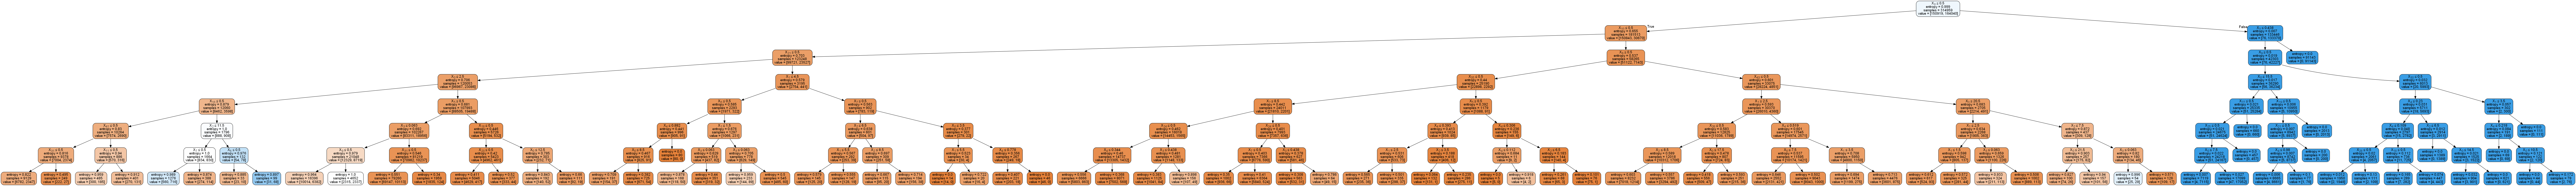

In [23]:
# Construct decision tree to identify features with good predictive capacity
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from pandas_ml import ConfusionMatrix
from sklearn import metrics


# Encode the neighborhoods
call_data = pd.get_dummies(call_data, drop_first=True)

# Split the data in test, train, target, features
X = call_data.drop(['Fast_Response'], axis=1)
Y = call_data.Fast_Response
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

np.random.seed(42)

# Train the Decision Tree Classifier
# Use entropy = no limit on samples for split
nfeatures = 6  # 6 produces the maximal AUC and accuracy
ndepth = 7
tree = DecisionTreeClassifier(criterion='entropy', max_features = nfeatures, max_depth=ndepth).fit(X_train, Y_train) 
y_ent_pred = tree.predict(X_test)

# Generate an accuracy Score
from sklearn.metrics import accuracy_score
print("Decision Tree accuracy is : {}%".format(accuracy_score(Y_test, y_ent_pred)*100))
confusion_matrix = ConfusionMatrix(Y_test, y_ent_pred)
print("Confusion matrix:\n%s" % confusion_matrix)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_ent_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC:\n%.5s" % auc)

# View a list of the features and their importance scores
bestfeatures = sorted(zip(X, tree.feature_importances_), key=lambda tup: tup[1], reverse=True)
print(bestfeatures[:nfeatures])

# Graph the struct of the decision tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The decision tree does quite well at predicting fast responses. It can achieve >90% accuracacy and >0.9 AUC with the features 'Call Type_visible', 'Scaled_Priority','Call Type_building-alarm', 'Call Type_non-emergency-call', 'Call Type_emergency-call'. The choice of variables pretty closely matches the linear correlations. Precinct_North did well on linear correlations, but is absent from the decision tree feature selection -- indeed, the best set of features is entirely related to the prioritization and the call type. 

As suspected, Call Type_visible -- officer already on the scene -- is a very important predictor. Call type visible is positively correlated with prioritization, but negatively correlated with the north precinct. Let's explore that by dropping the prioritization and seeing what happens.

In [24]:
# Split the data in test, train, target, features
X = call_data.drop(['Fast_Response', 'Scaled_Priority'], axis=1)
Y = call_data.Fast_Response
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

np.random.seed(42)

# Train the Decision Tree Classifier
# Use entropy = no limit on samples for split
nfeatures = 7  # 8 produces the maximal AUC and accuracy
ndepth = 7
tree = DecisionTreeClassifier(criterion='entropy', max_features = nfeatures, max_depth=ndepth).fit(X_train, Y_train) 
y_ent_pred = tree.predict(X_test)

# Generate an accuracy Score
from sklearn.metrics import accuracy_score
print("Decision Tree, no scaled priority, accuracy is : {}%".format(accuracy_score(Y_test, y_ent_pred)*100))
confusion_matrix = ConfusionMatrix(Y_test, y_ent_pred)
print("Confusion matrix:\n%s" % confusion_matrix)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_ent_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC:\n%.5s" % auc)

# View a list of the features and their importance scores
bestfeatures = sorted(zip(X, tree.feature_importances_), key=lambda tup: tup[1], reverse=True)
print(bestfeatures[:nfeatures])

Decision Tree, no scaled priority, accuracy is : 90.2044704089%
Confusion matrix:
Predicted  False  True  __all__
Actual                         
False       4073  2989     7062
True        4956  3731     8687
__all__     9029  6720    15749
AUC:
0.905
[('Call Type_visible', 0.6015326303308883), ('Call Type_emergency-call', 0.24951877014623713), ('Call Type_non-emergency-call', 0.062093112719054454), ('Call Type_building-alarm', 0.057691481767605954), ('Neighborhood_Central Business District', 0.011286386825238671), ('token_prob', 0.004485439315391773), ('Precinct_NORTH', 0.0035109341886272265)]


If the assigned priority is not available, we can still train a decision tree to produce >90% accuracy and >0.9 AUC -- it just takes more features to do so. The call type is still most predictive, but now location info (precinct north, the downtown business area, SODO), the call hour, and the token_prob (related to the call content) are all contributing to the model prediction. This can be thought of as what would drive response time if we didn't have a dispatcher setting prioritization. Maybe the North precinct has a point about resources, and maybe downtown/sodo are right to have crummy reputations as neighborhoods. And by comparing the two models, we can say the dispatchers are doing a pretty good job setting priorities. That was essentially the reason for abolishing the non-emergency phone line in 2018 -- and it seems to bear out.

In [31]:
# Set up a list of possible features for the random forest to sample from
# Split the data in test, train, target, features
X = call_data.drop(['Fast_Response'], axis=1)
Y = call_data.Fast_Response
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

selected_features = ['Call Type_visible','Scaled_Priority','Call Type_building-alarm',
                     'Call Type_non-emergency-call','Call Type_emergency-call']  

# Train the Random Forest Classifier
nTrees = 100
max_depth = 6

from sklearn.ensemble import RandomForestClassifier

clf_select= RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth)
clf_select.fit(X_train[selected_features], Y_train)
Y_predicted = clf_select.predict(X_test[selected_features])

# Assess the accuracy
print("Random Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, Y_predicted)*100))

# Assess the AUC
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_predicted)
print("Random Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

Random Forest accuracy is : 90.201930%
Random Forest AUC is: 90.616176%


The random forest does just as well with the selected variables as the decision tree did! This is great because in milestone 3 we wil be applying boosting techniques to improve the model further.

In [26]:
# Try again with the variables selected while NOT including the assigned priortization
# reuse the test/train data

selected_features = ['Call Type_visible','Call Type_emergency-call','Call Type_non-emergency-call',
                    'Precinct_NORTH','Neighborhood_Central Business District','Call_Hour','token_prob','Neighborhood_SODO']

# Train the Random Forest Classifier
nTrees = 100
max_depth = 6

from sklearn.ensemble import RandomForestClassifier

clf_select= RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth)
clf_select.fit(X_train[selected_features], Y_train)
Y_predicted = clf_select.predict(X_test[selected_features])

# Assess the accuracy
print("No Priority: Random Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, Y_predicted)*100))

# Assess the AUC
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_predicted)
print("No Priority: Random Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

No Priority: Random Forest accuracy is : 90.212090%
No Priority: Random Forest AUC is: 90.628411%


Again, without prioritization but with the location, token, and call_hour variables, we're able to predict the fast responses almost as accuractely with almost as good AUC. 

In [27]:
# Try with all features available
clf= RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth)
clf.fit(X_train, Y_train)
y_ent_pred = clf.predict(X_test)

# Assess the accuracy
print("All features Random Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_ent_pred)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_ent_pred)
print("All features Random Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

All features Random Forest accuracy is : 90.180340%
All features Random Forest AUC is: 90.598938%


Using all variables, rather than the selected ones, the random forest does almost as well. Which I suppose is what random forests are good at. 

### Model Performance Evaluation

AUC was used alongside accuracy. See commentary and markdown above.

## Improved Machine Learning Model(s)

I am implementing Gradient Boosting and Ada Boost on the Random Forest to evaulating how they compare (hopefully improve on) the Random Forest and Decision Tree.

In [44]:
# Gradient boost the decision forest. This runs fairly slowly.
from sklearn.ensemble import GradientBoostingClassifier

nTrees = 100 # same as prior
max_depth = 6

clf_gbc = GradientBoostingClassifier(n_estimators=nTrees, max_depth=max_depth)
clf_gbc.fit(X_train, Y_train)
y_pred_gbc = clf_gbc.predict(X_test)

# Assess the accuracy
print("All features Gradient Boosted Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_pred_sgd)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_gbc)
print("All features Gradient Boosted Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

All features Gradient Boosted Forest accuracy is : 90.353061%
All features Gradient Boosted Forest AUC is: 91.451502%


In [45]:
# Using selected features
selected_features = ['Call Type_visible','Scaled_Priority','Call Type_building-alarm',
                     'Call Type_non-emergency-call','Call Type_emergency-call']  


clf_gbc = GradientBoostingClassifier(n_estimators=nTrees, max_depth=max_depth)
clf_gbc.fit(X_train[selected_features], Y_train)
y_pred_gbc = clf_gbc.predict(X_test[selected_features])

# Assess the accuracy
print("Selected features Gradient Boosted Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_pred_sgd)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_gbc)
print("Selected features Gradient Boosted Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))


# No priority available - selected features
selected_features = ['Call Type_visible','Call Type_emergency-call','Call Type_non-emergency-call',
                    'Precinct_NORTH','Neighborhood_Central Business District','Call_Hour','token_prob','Neighborhood_SODO']
clf_gbc = GradientBoostingClassifier(n_estimators=nTrees, max_depth=max_depth)
clf_gbc.fit(X_train[selected_features], Y_train)
y_pred_gbc = clf_gbc.predict(X_test[selected_features])

# Assess the accuracy
print("No priority: Gradient Boosted Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_pred_sgd)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_gbc)
print("No Priority: Gradient Boosted Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

Selected features Gradient Boosted Forest accuracy is : 90.353061%
Selected features Gradient Boosted Forest AUC is: 90.617391%
No priority: Gradient Boosted Forest accuracy is : 90.353061%
No Priority: Gradient Boosted Forest AUC is: 91.222517%


In [46]:
# Finally, use AdaBoost to boost the forest
from sklearn.ensemble import AdaBoostClassifier

nTrees = 100 # same as prior
max_depth = 6

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),n_estimators=nTrees)
clf_ada.fit(X_train, Y_train)
y_pred_ada = clf_ada.predict(X_test)

# Assess the accuracy
print("All features Ada Boosted Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_pred_ada)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_ada)
print("All features Ada Boosted Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

# Using selected features
selected_features = ['Call Type_visible','Scaled_Priority','Call Type_building-alarm',
                     'Call Type_non-emergency-call','Call Type_emergency-call'] 
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),n_estimators=nTrees)
clf_ada.fit(X_train[selected_features], Y_train)
y_pred_ada = clf_ada.predict(X_test[selected_features])

# Assess the accuracy
print("Selected features Ada Boosted Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_pred_ada)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_ada)
print("Selected features Ada Boosted Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

# No priority available - selected features
selected_features = ['Call Type_visible','Call Type_emergency-call','Call Type_non-emergency-call',
                    'Precinct_NORTH','Neighborhood_Central Business District','Call_Hour','token_prob','Neighborhood_SODO']
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),n_estimators=nTrees)
clf_ada.fit(X_train[selected_features], Y_train)
y_pred_ada = clf_ada.predict(X_test[selected_features])

# Assess the accuracy
print("No priority: Ada Boosted Forest accuracy is : {:3f}%".format(accuracy_score(Y_test, y_pred_ada)*100))
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_ada)
print("No  Ada Boosted Forest AUC is: {:3f}%".format(100*metrics.auc(fpr, tpr)))

All features Ada Boosted Forest accuracy is : 90.645161%
All features Ada Boosted Forest AUC is: 90.826432%
Selected features Ada Boosted Forest accuracy is : 90.203200%
Selected features Ada Boosted Forest AUC is: 90.617391%
No priority: Ada Boosted Forest accuracy is : 90.835662%
No  Ada Boosted Forest AUC is: 91.091981%
